In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
redWine = pd.read_csv('/Users/sepehr/Desktop/ECE_225A/final_project/ece225_final_project/Dataset/winequality-red.csv',sep = ';')
whiteWine = pd.read_csv('/Users/sepehr/Desktop/ECE_225A/final_project/ece225_final_project/Dataset/winequality-white.csv',sep = ';')

In [3]:
redWine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
whiteWine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
redWine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [6]:
print("Red Wine Quality dataset has {} samples with {} features each.".format(*redWine.shape))
display(redWine.head())

Red Wine Quality dataset has 1599 samples with 12 features each.


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
#Let's check how the data is distributed
redWine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [51]:
whiteWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 425.9 KB


In [9]:
print("White Wine Quality dataset has {} samples with {} features each.".format(*whiteWine.shape))
display(whiteWine.head())

White Wine Quality dataset has 4898 samples with 12 features each.


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

## Data Cleaning

In [10]:
missingValuesRed = redWine.isnull().sum()
missingValuesWhite = whiteWine.isnull().sum()
display("Total number of missing values in our red wine dataset are:", missingValuesRed)
display("Total number of missing values in our white wine dataset are:", missingValuesWhite)

'Total number of missing values in our red wine dataset are:'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

'Total number of missing values in our white wine dataset are:'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [55]:
redWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [ ]:
redWine.describe()

In [56]:
whiteWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267  
std       0.151001     0.114126     1.230621  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

In [11]:

from sklearn import preprocessing

featuresRed = redWine.keys()
featuresWhite = whiteWine.keys()

min_max_scaler = preprocessing.MinMaxScaler()
data_array_scaled_red = min_max_scaler.fit_transform(redWine)
data_array_scaled_white = min_max_scaler.fit_transform(whiteWine)

data_scaled_red = pd.DataFrame()
data_scaled_white = pd.DataFrame()
for x in range(0,12):
    dataset_red = pd.DataFrame({featuresRed[x]:data_array_scaled_red[:,x]})
    data_scaled_red = pd.concat([data_scaled_red, dataset_red], axis=1)
for x in range(0,12):
    dataset_white = pd.DataFrame({featuresWhite[x]:data_array_scaled_white[:,x]})
    data_scaled_white = pd.concat([data_scaled_white, dataset_white], axis=1)
    
display(data_scaled_red.head())
display(data_scaled_white.head())


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.215385      0.4  
2  0.215385      0.4  
3  0.215385      0.6  
4  0.153846      0.4

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  quality  
0  0.129032      0.5  
1  0.241935      0.5  
2  0.338710      0.5  
3  0.306452      0.5  
4  0.306452      0.5

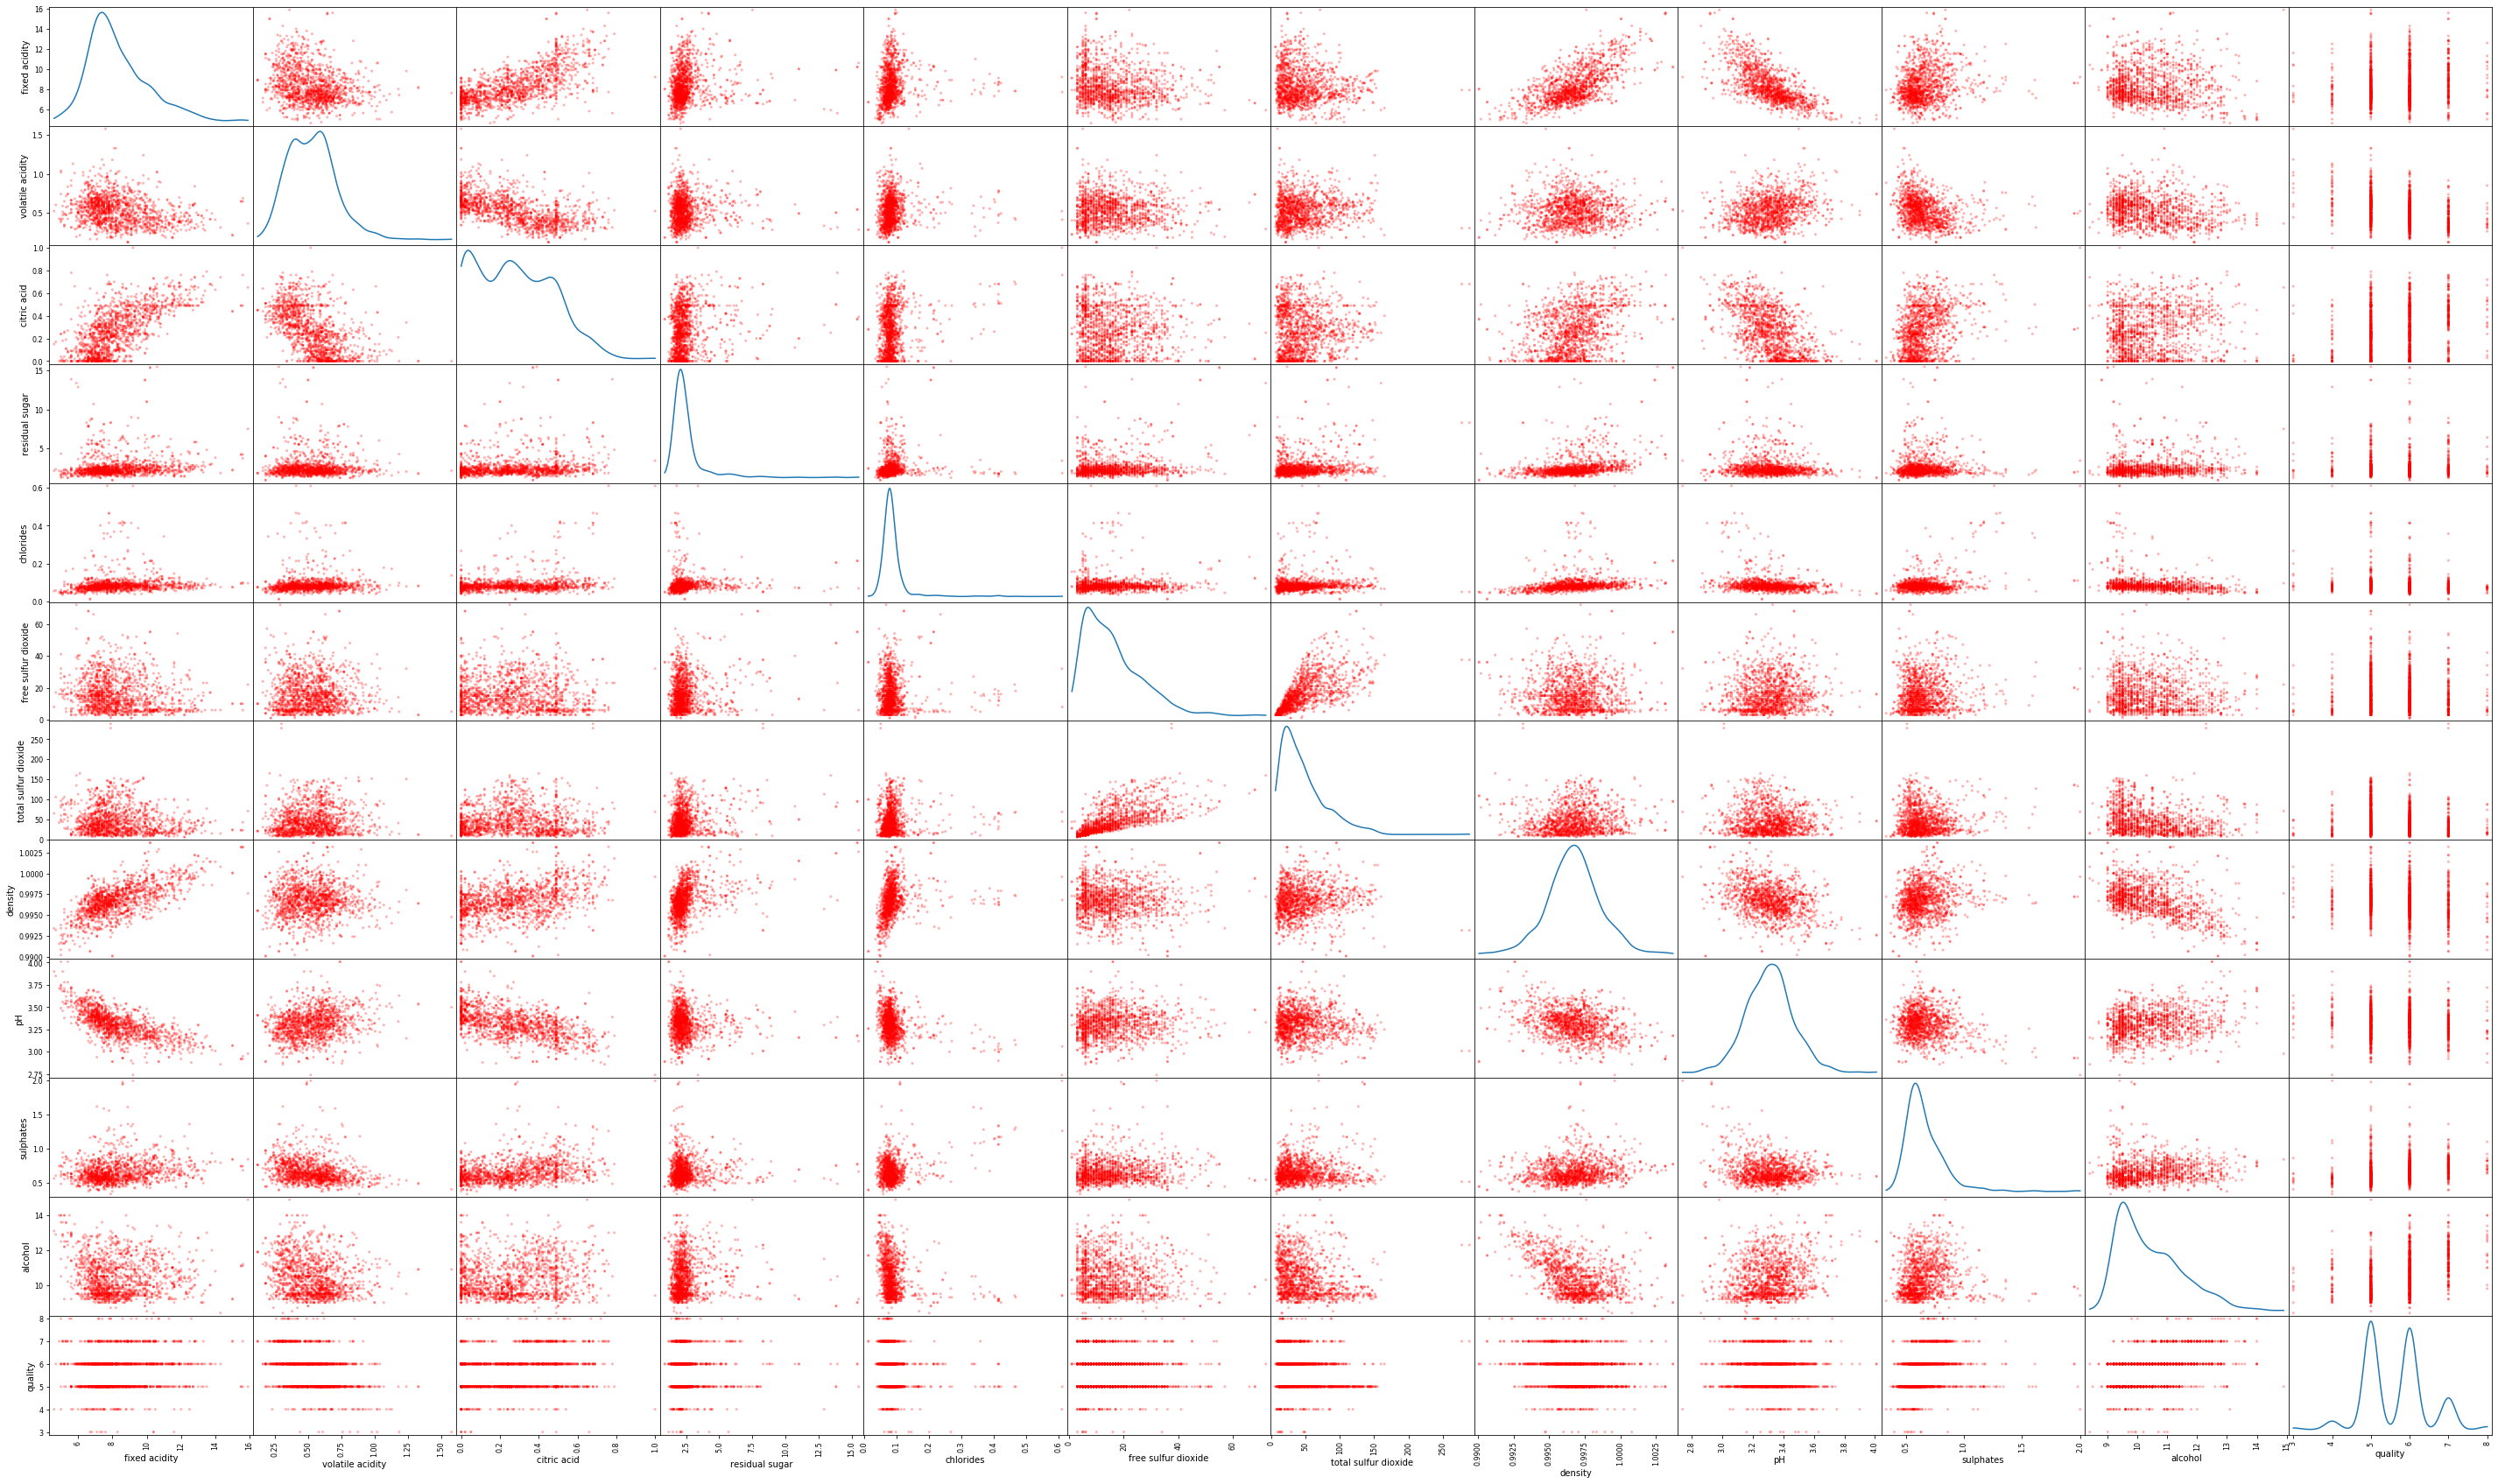

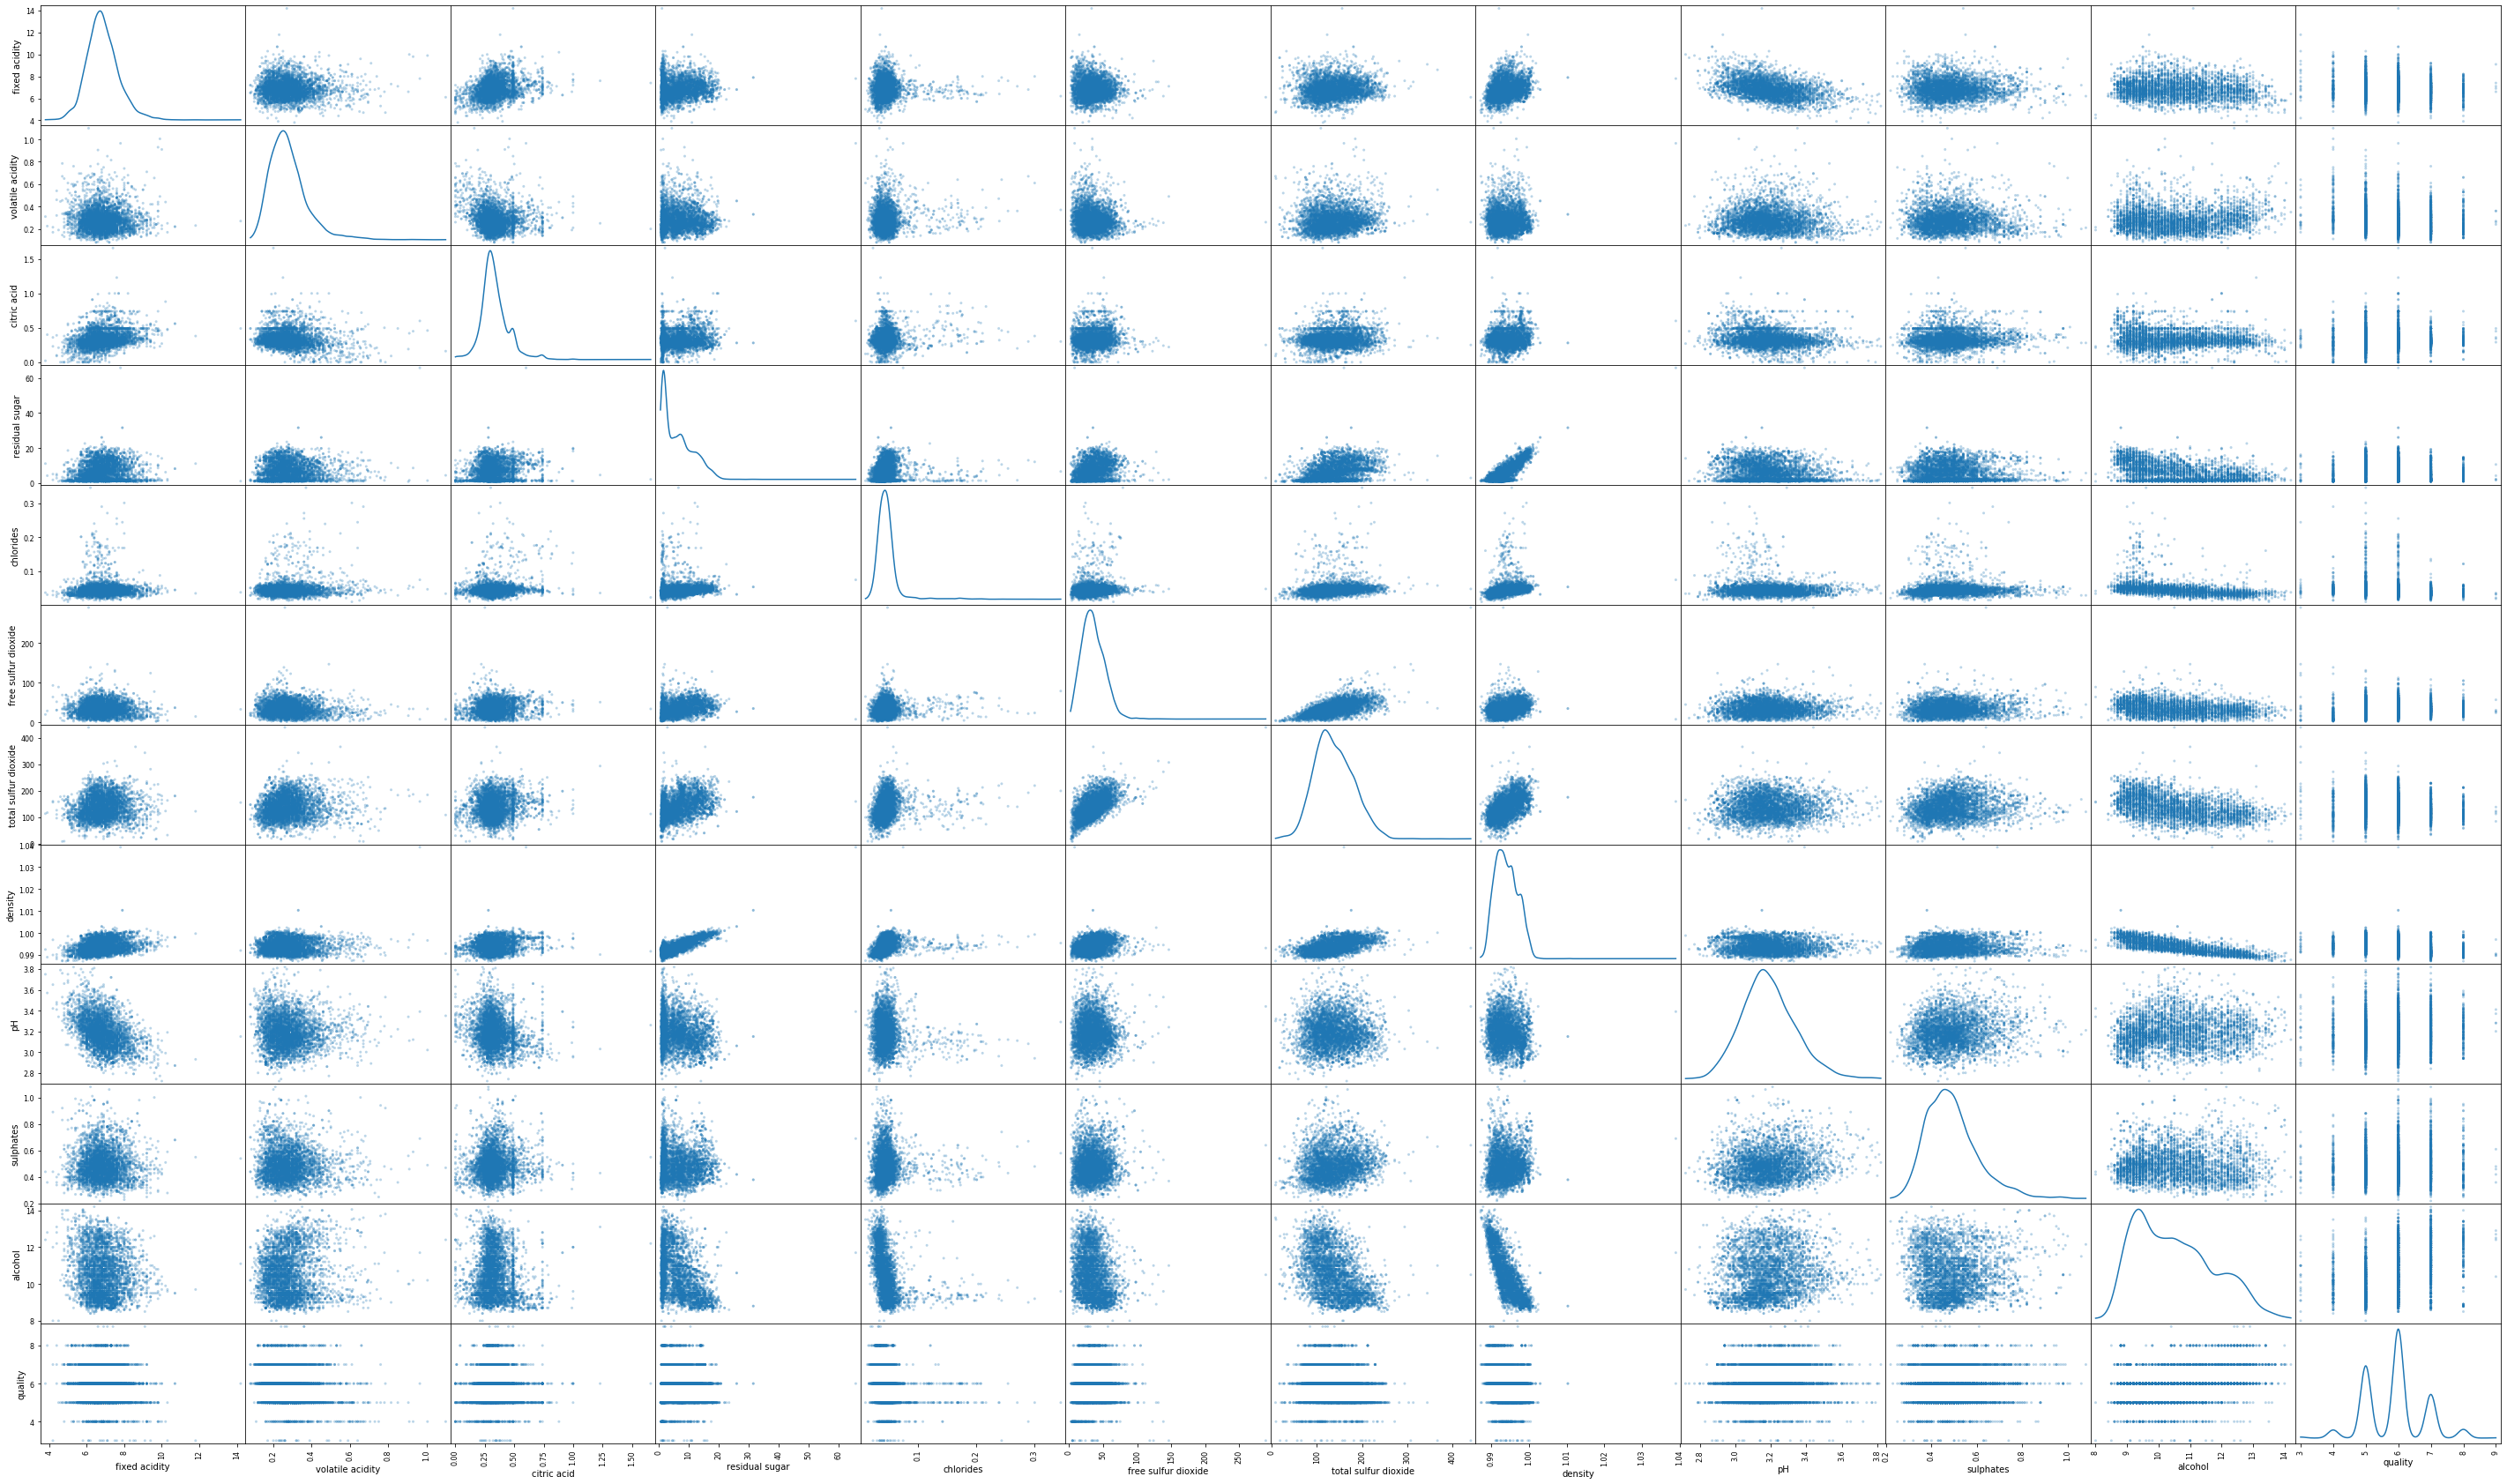

In [12]:
pd.plotting.scatter_matrix(redWine, alpha = 0.3, figsize = (50,30), diagonal = 'kde',c="r");
pd.plotting.scatter_matrix(whiteWine, alpha = 0.3, figsize = (50,30), diagonal = 'kde');

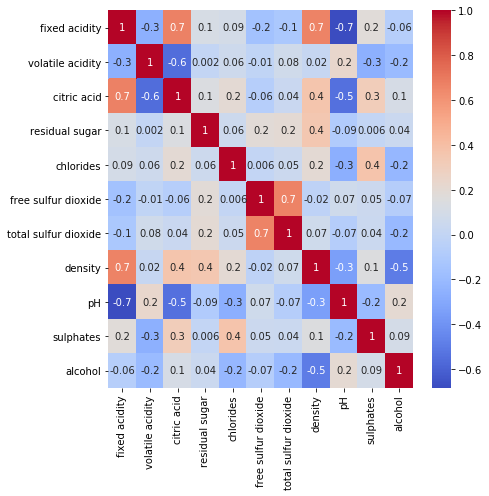

In [58]:
## red wine

fig, ax = plt.subplots(figsize = (7,7))
ax = sns.heatmap(redWine.corr(), annot=True,fmt='.1g',cmap='coolwarm')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
fig.tight_layout()
plt.show()

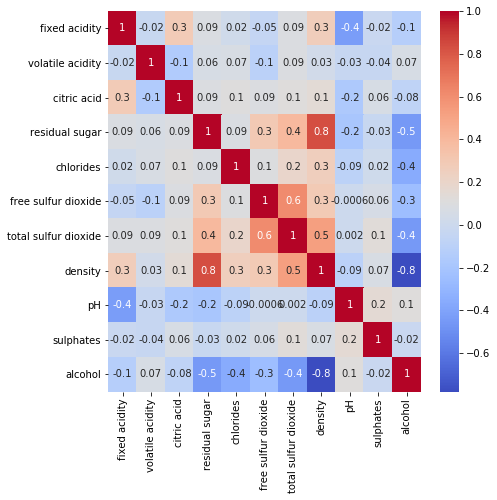

In [59]:
## White Wine

plt.figure(figsize = (7,7))
ax = sns.heatmap(whiteWine.corr(), annot=True,fmt='.1g',cmap='coolwarm')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
fig.tight_layout()
plt.show()

## Let's do some plotting to know how the data columns are distributed in the dataset

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


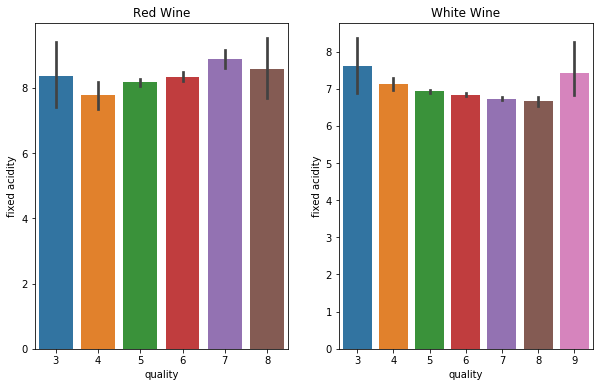

In [15]:
#fig = plt.figure(figsize = (10,6))
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "fixed acidity", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "fixed acidity", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


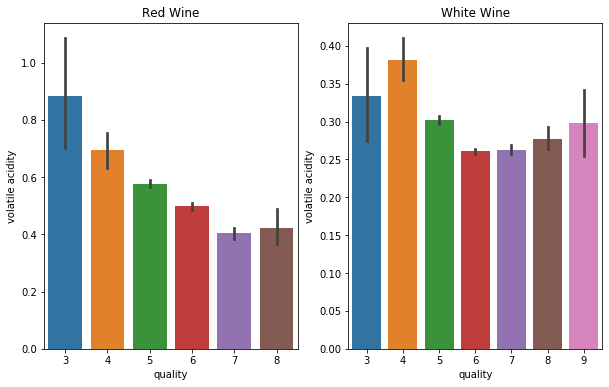

In [16]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "volatile acidity", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "volatile acidity", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


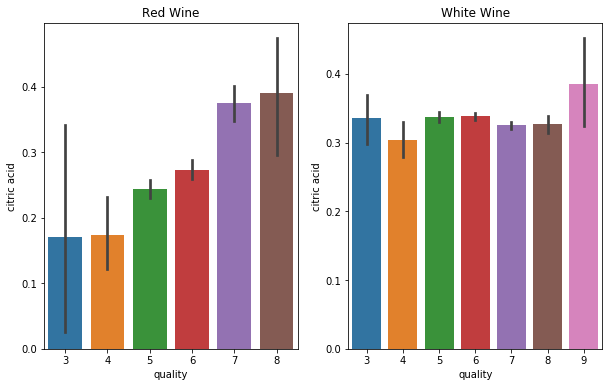

In [17]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "citric acid", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "citric acid", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


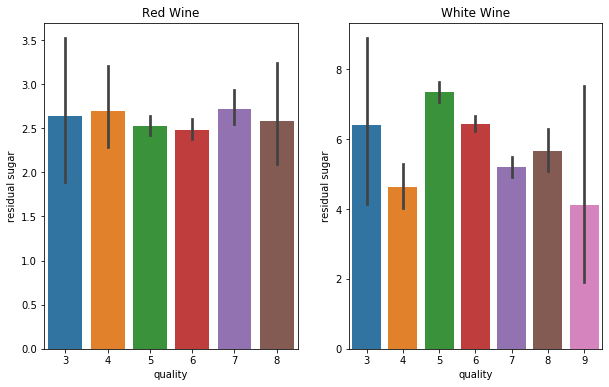

In [18]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "residual sugar", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "residual sugar", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


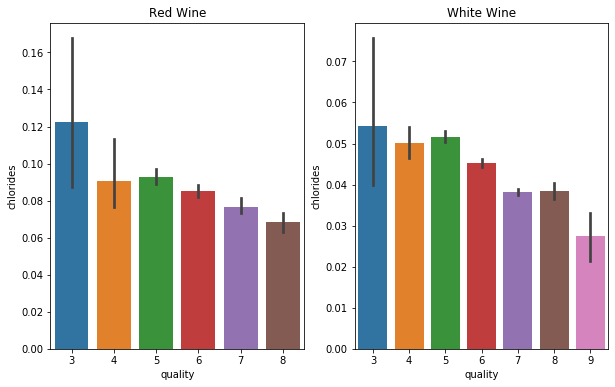

In [19]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "chlorides", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "chlorides", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


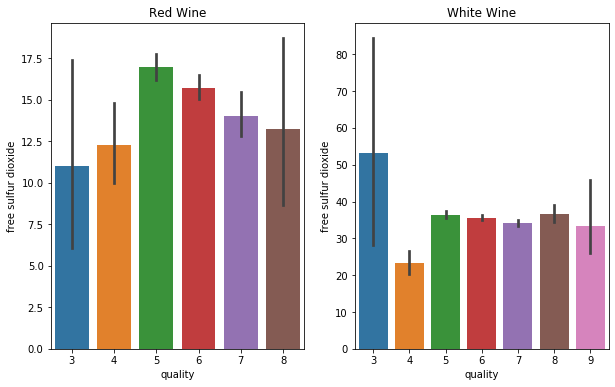

In [20]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "free sulfur dioxide", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "free sulfur dioxide", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


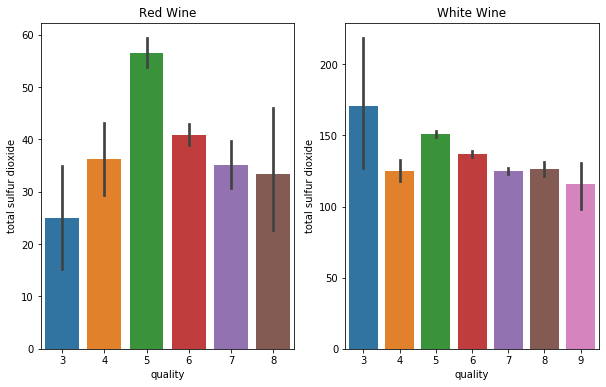

In [21]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "total sulfur dioxide", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "total sulfur dioxide", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


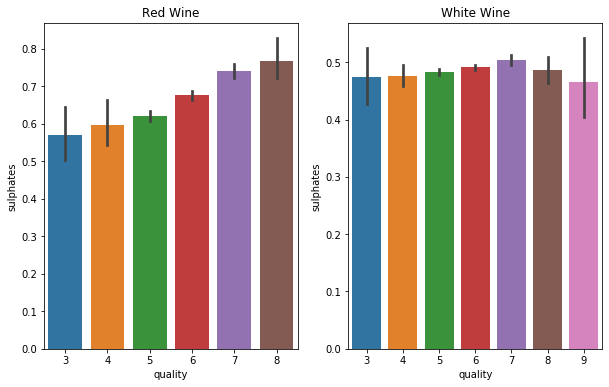

In [22]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "sulphates", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "sulphates", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


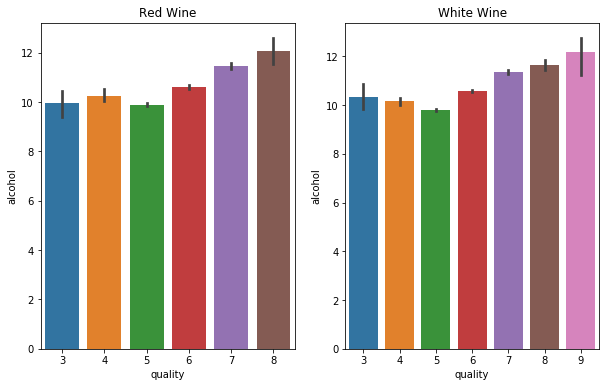

In [23]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "alcohol", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "alcohol", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


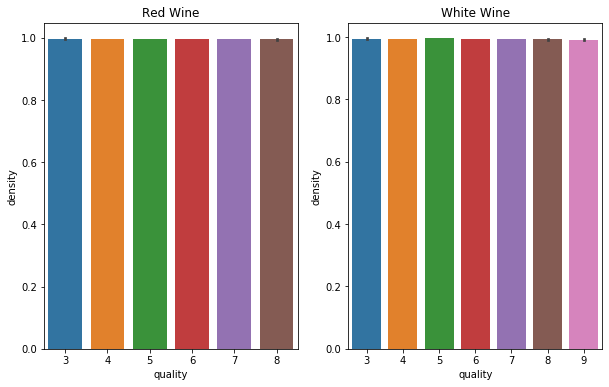

In [24]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "density", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "density", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


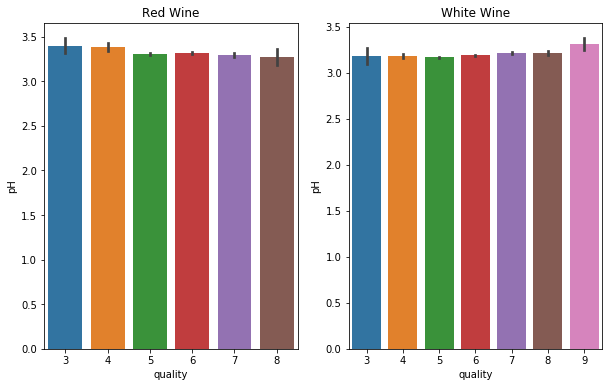

In [25]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "pH", data = redWine, ax=ax[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "pH", data = whiteWine, ax=ax[1]).set_title('White Wine')
fig.show()

/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/sepehr/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


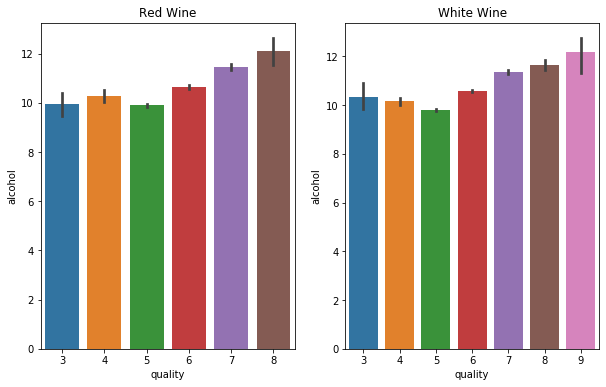

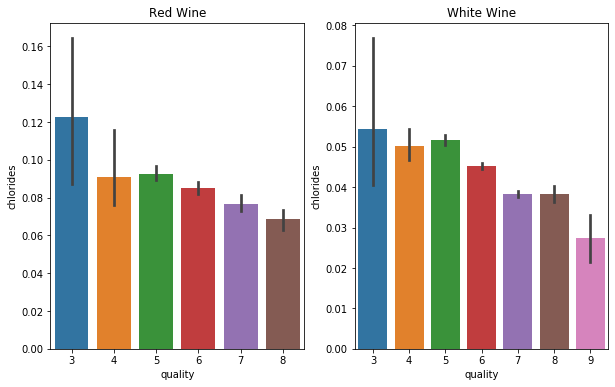

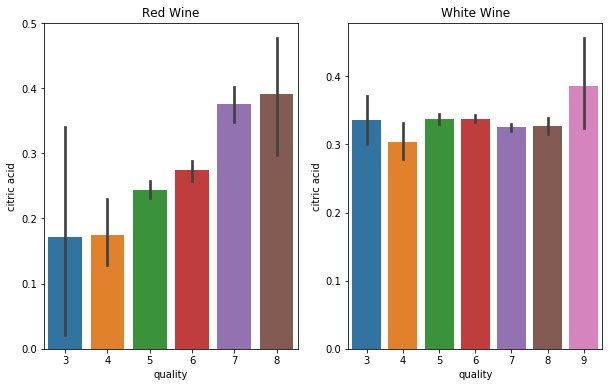

In [26]:
fig1, ax1 = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "alcohol", data = redWine, ax=ax1[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "alcohol", data = whiteWine, ax=ax1[1]).set_title('White Wine')
fig1.show()
fig2, ax2 = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "chlorides", data = redWine, ax=ax2[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "chlorides", data = whiteWine, ax=ax2[1]).set_title('White Wine')
fig2.show()
fig3, ax3 = plt.subplots(1,2,figsize = (10,6))
sns.barplot(x = "quality", y = "citric acid", data = redWine, ax=ax3[0]).set_title('Red Wine')
sns.barplot(x = "quality", y = "citric acid", data = whiteWine, ax=ax3[1]).set_title('White Wine')
fig3.show()

In [27]:
bucket = (2, 6.1, 8)
bucket_label = ['bad', 'good']
redWine['quality'] = pd.cut(redWine['quality'], bins = bucket, labels = bucket_label)
display(redWine.head())
redWine['quality'] = redWine['quality'].map({'bad':0,'good':1})
display("Total number of different Red Wine samples: ",redWine['quality'].value_counts())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8     bad  
4      9.4     bad

'Total number of different Red Wine samples: '

0    1382
1     217
Name: quality, dtype: int64

In [28]:
bucket1 = (2, 6.1, 9)
whiteWine['quality'] = pd.cut(whiteWine['quality'], bins = bucket1, labels = bucket_label)
display(whiteWine.head())
whiteWine['quality'] = whiteWine['quality'].map({'bad':0,'good':1})
display("Total number of different White Wine samples: ",whiteWine['quality'].value_counts())

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol quality  
0      8.8     bad  
1      9.5     bad  
2     10.1     bad  
3      9.9     bad  
4      9.9     bad

'Total number of different White Wine samples: '

0    3838
1    1060
Name: quality, dtype: int64

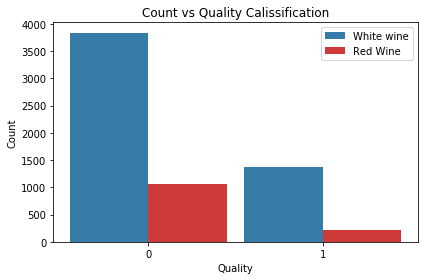

In [50]:
fig, ax = plt.subplots()
n_groups = 2
MSE_4 = [3838,1382]
MSE_all = [1060,217]
index = np.arange(n_groups)
bar_width = 0.45
opacity = 0.8
rects1 = plt.bar(index, MSE_4, bar_width,
alpha=opacity,
color='#055b93',
label='White wine')

rects2 = plt.bar(index + bar_width, MSE_all, bar_width,
alpha=opacity,
color='#c20808',
label='Red Wine')

plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count vs Quality Calissification')
plt.xticks(index + bar_width/ 2, ('0', '1'))
plt.legend()

plt.tight_layout()
plt.show()

## Train Model

In [30]:
X_red = redWine.drop('quality', axis = 1)
y_red = redWine['quality']

X_white = whiteWine.drop('quality', axis = 1)
y_white = whiteWine['quality']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_red, y_red, test_size = 0.25, random_state = 42)

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_white, y_white, test_size = 0.25, random_state = 42)

scR = StandardScaler()
scW = StandardScaler()

X_train_r = scR.fit_transform(X_train_r)
X_test_r = scR.fit_transform(X_test_r)

X_train_w = scW.fit_transform(X_train_w)
X_test_w = scW.fit_transform(X_test_w)

## Logistic Regression

In [32]:
LR_r = LogisticRegression()
LR_r.fit(X_train_r, y_train_r)
pred_LR_r = LR_r.predict(X_test_r)

LR_w = LogisticRegression()
LR_w.fit(X_train_w, y_train_w)
pred_LR_w = LR_w.predict(X_test_w)

print(classification_report(y_test_r, pred_LR_r))
print(classification_report(y_test_w, pred_LR_w))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       347
           1       0.64      0.30      0.41        53

    accuracy                           0.89       400
   macro avg       0.77      0.64      0.67       400
weighted avg       0.87      0.89      0.87       400

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       941
           1       0.60      0.29      0.39       284

    accuracy                           0.79      1225
   macro avg       0.71      0.62      0.63      1225
weighted avg       0.77      0.79      0.76      1225



## Random Forest

In [31]:
rfc_r = RandomForestClassifier(n_estimators=200)
rfc_r.fit(X_train_r, y_train_r)
pred_rfc_r = rfc_r.predict(X_test_r)

rfc_w = RandomForestClassifier(n_estimators=200)
rfc_w.fit(X_train_w, y_train_w)
pred_rfc_w = rfc_w.predict(X_test_w)

print(classification_report(y_test_r, pred_rfc_r))
print(classification_report(y_test_w, pred_rfc_w))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.62      0.38      0.47        53

    accuracy                           0.89       400
   macro avg       0.77      0.67      0.70       400
weighted avg       0.87      0.89      0.88       400

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       941
           1       0.84      0.60      0.70       284

    accuracy                           0.88      1225
   macro avg       0.86      0.78      0.81      1225
weighted avg       0.88      0.88      0.87      1225



## SVM

In [33]:
svc_r = SVC()
svc_r.fit(X_train_r, y_train_r)
pred_svc_r = svc_r.predict(X_test_r)

svc_w = SVC()
svc_w.fit(X_train_w, y_train_w)
pred_svc_w = svc_w.predict(X_test_w)

print(classification_report(y_test_r, pred_svc_r))
print(classification_report(y_test_w, pred_svc_w))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.70      0.26      0.38        53

    accuracy                           0.89       400
   macro avg       0.80      0.62      0.66       400
weighted avg       0.87      0.89      0.86       400

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       941
           1       0.76      0.32      0.45       284

    accuracy                           0.82      1225
   macro avg       0.79      0.64      0.67      1225
weighted avg       0.81      0.82      0.79      1225



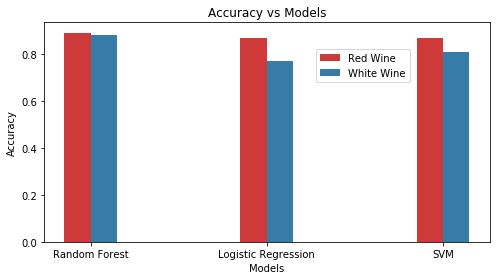

In [47]:
fig, ax = plt.subplots(figsize = (7,4))
n_groups = 3
acc_red = [0.89,0.87,0.87]
acc_w = [ 0.88, 0.77, 0.81]
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
# ax = fig.add_axes([0,0,1,1])
rects1 = plt.bar(index, acc_red, bar_width,
alpha=opacity,
color='#c20808',
label='Red Wine')

rects2 = plt.bar(index + bar_width, acc_w, bar_width,
alpha=opacity,
color='#055b93',
label='White Wine')


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Models')
plt.xticks(index + bar_width/ 2, ('Random Forest', 'Logistic Regression', 'SVM'))
plt.legend(loc='best', bbox_to_anchor=(0.6, 0.4, 0.5, 0.5))

plt.tight_layout()
plt.show()

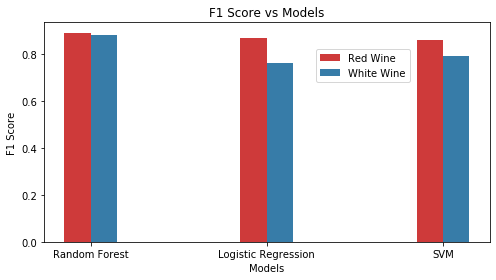

In [48]:
fig, ax = plt.subplots(figsize = (7,4))
n_groups = 3
f_red = [0.89,0.87,0.86]
f_w = [ 0.88, 0.76, 0.79]
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
# ax = fig.add_axes([0,0,1,1])
rects1 = plt.bar(index, f_red, bar_width,
alpha=opacity,
color='#c20808',
label='Red Wine')

rects2 = plt.bar(index + bar_width, f_w, bar_width,
alpha=opacity,
color='#055b93',
label='White Wine')


plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Models')
plt.xticks(index + bar_width/ 2, ('Random Forest', 'Logistic Regression', 'SVM'))
plt.legend(loc='best', bbox_to_anchor=(0.6, 0.4, 0.5, 0.5))

plt.tight_layout()
plt.show()